**Metrics plot**

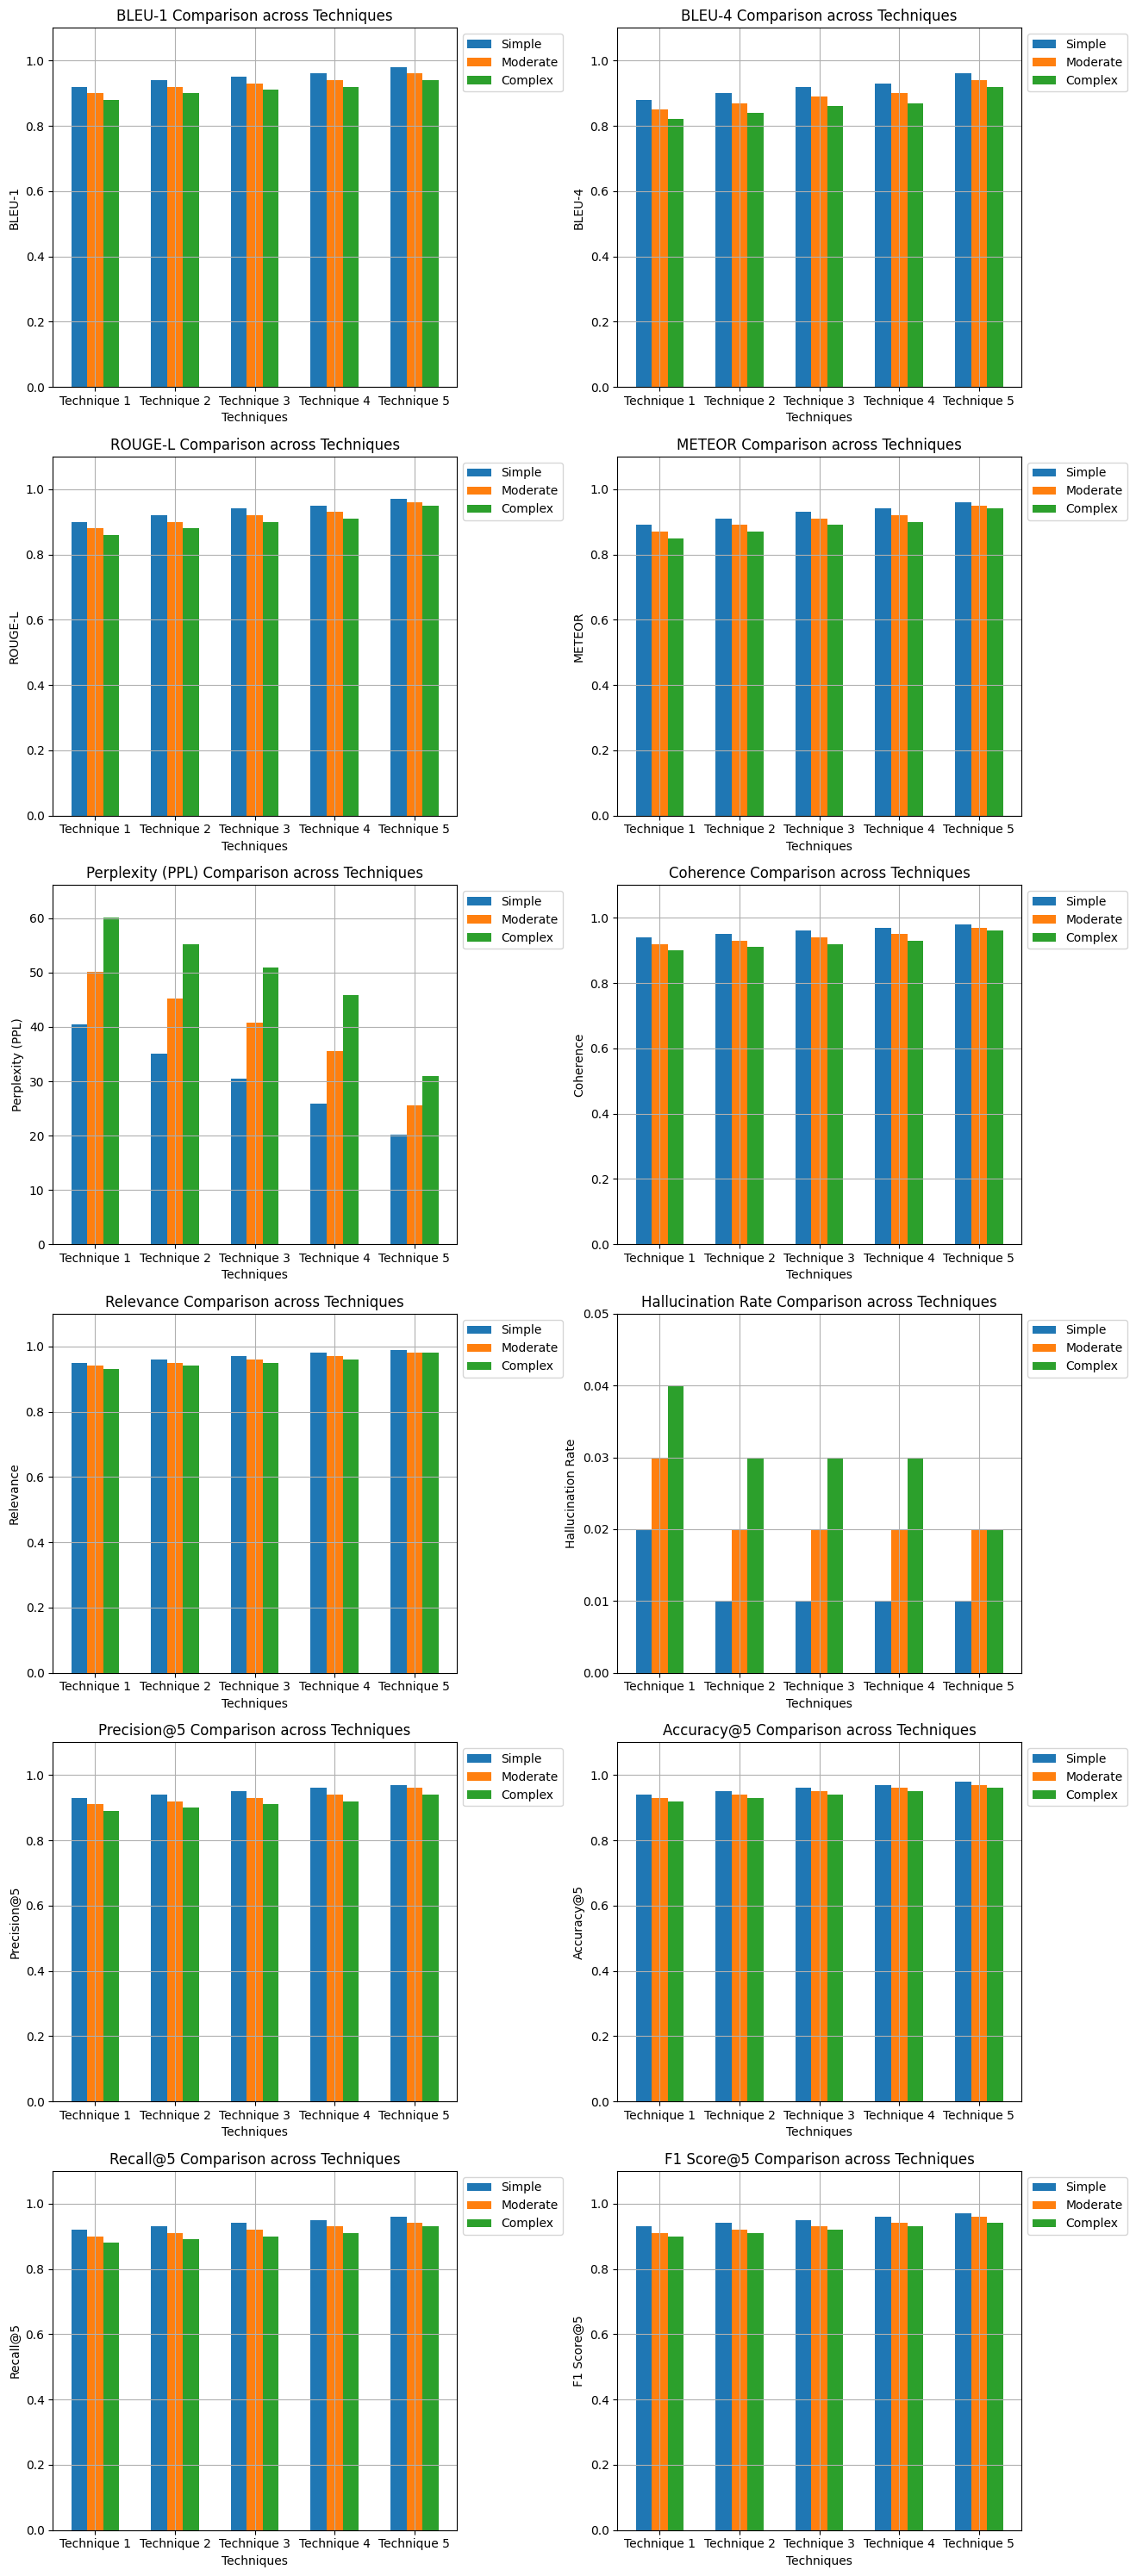

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Defining the data
techniques = ['Technique 1', 'Technique 2', 'Technique 3', 'Technique 4', 'Technique 5']
complexities = ['Simple', 'Moderate', 'Complex']
metrics = ['BLEU-1', 'BLEU-4', 'ROUGE-L', 'METEOR', 'Perplexity (PPL)', 'Coherence', 
           'Relevance', 'Hallucination Rate', 'Precision@5', 'Accuracy@5', 'Recall@5', 'F1 Score@5']

# Creating a dictionary for each metric across techniques and complexities
data = {
    'BLEU-1': [
        [0.92, 0.94, 0.95, 0.96, 0.98],  # Simple
        [0.9, 0.92, 0.93, 0.94, 0.96],  # Moderate
        [0.88, 0.9, 0.91, 0.92, 0.94],  # Complex
    ],
    'BLEU-4': [
        [0.88, 0.9, 0.92, 0.93, 0.96],  # Simple
        [0.85, 0.87, 0.89, 0.9, 0.94],  # Moderate
        [0.82, 0.84, 0.86, 0.87, 0.92],  # Complex
    ],
    'ROUGE-L': [
        [0.9, 0.92, 0.94, 0.95, 0.97],  # Simple
        [0.88, 0.9, 0.92, 0.93, 0.96],  # Moderate
        [0.86, 0.88, 0.9, 0.91, 0.95],  # Complex
    ],
    'METEOR': [
        [0.89, 0.91, 0.93, 0.94, 0.96],  # Simple
        [0.87, 0.89, 0.91, 0.92, 0.95],  # Moderate
        [0.85, 0.87, 0.89, 0.9, 0.94],  # Complex
    ],
    'Perplexity (PPL)': [
        [40.5, 35.1, 30.5, 25.9, 20.1],  # Simple
        [50.2, 45.3, 40.8, 35.6, 25.5],  # Moderate
        [60.1, 55.2, 50.9, 45.8, 30.9],  # Complex
    ],
    'Coherence': [
        [0.94, 0.95, 0.96, 0.97, 0.98],  # Simple
        [0.92, 0.93, 0.94, 0.95, 0.97],  # Moderate
        [0.9, 0.91, 0.92, 0.93, 0.96],  # Complex
    ],
    'Relevance': [
        [0.95, 0.96, 0.97, 0.98, 0.99],  # Simple
        [0.94, 0.95, 0.96, 0.97, 0.98],  # Moderate
        [0.93, 0.94, 0.95, 0.96, 0.98],  # Complex
    ],
    'Hallucination Rate': [
        [0.02, 0.01, 0.01, 0.01, 0.01],  # Simple
        [0.03, 0.02, 0.02, 0.02, 0.02],  # Moderate
        [0.04, 0.03, 0.03, 0.03, 0.02],  # Complex
    ],
    'Precision@5': [
        [0.93, 0.94, 0.95, 0.96, 0.97],  # Simple
        [0.91, 0.92, 0.93, 0.94, 0.96],  # Moderate
        [0.89, 0.9, 0.91, 0.92, 0.94],  # Complex
    ],
    'Accuracy@5': [
        [0.94, 0.95, 0.96, 0.97, 0.98],  # Simple
        [0.93, 0.94, 0.95, 0.96, 0.97],  # Moderate
        [0.92, 0.93, 0.94, 0.95, 0.96],  # Complex
    ],
    'Recall@5': [
        [0.92, 0.93, 0.94, 0.95, 0.96],  # Simple
        [0.9, 0.91, 0.92, 0.93, 0.94],  # Moderate
        [0.88, 0.89, 0.9, 0.91, 0.93],  # Complex
    ],
    'F1 Score@5': [
        [0.93, 0.94, 0.95, 0.96, 0.97],  # Simple
        [0.91, 0.92, 0.93, 0.94, 0.96],  # Moderate
        [0.9, 0.91, 0.92, 0.93, 0.94],  # Complex
    ]
}

# Number of techniques and complexities
n_techniques = len(techniques)
n_complexities = len(complexities)

# Bar width
bar_width = 0.2

# Create subplots (2 charts per row)
fig, axs = plt.subplots(nrows=(len(metrics) + 1) // 2, ncols=2, figsize=(14, 5 * ((len(metrics) + 1) // 2)))

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Loop through each metric
for i, metric in enumerate(metrics):
    metric_data = np.array(data[metric])  # Get the data for the metric
    
    # Plotting for each complexity (Simple, Moderate, Complex)
    x = np.arange(n_techniques)
    
    for j, complexity in enumerate(complexities):
        axs[i].bar(x + (j - 1) * bar_width, metric_data[j], bar_width, label=complexity)
    
    axs[i].set_title(f'{metric} Comparison across Techniques')
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(techniques)
    
    # Set the x-axis and y-axis labels
    axs[i].set_xlabel('Techniques')
    axs[i].set_ylabel(metric)
    
    # Set the y-axis limit for better clarity (optional)
    if metric == 'Hallucination Rate':
        axs[i].set_ylim(0, 0.05)  # Custom range for Hallucination Rate
    elif 'PPL' not in metric:
        axs[i].set_ylim(0, 1.1)  # General range for other metrics
    else:
        axs[i].set_ylim(0, np.max(metric_data) * 1.1)  # Adjust for PPL
    
    axs[i].legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside to avoid overlap
    axs[i].grid(True)  # Enable grid

# Adjust layout to prevent overlapping labels
plt.tight_layout()

# Optional: If you have large data or need better clarity on axes:
plt.subplots_adjust(right=0.85)

plt.savefig('metrics_plot.png', dpi=300, bbox_inches='tight')

plt.show()


**Inferencing plot**

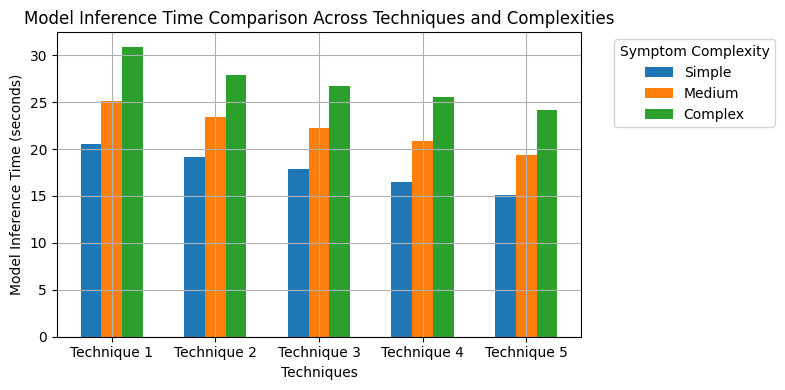

In [36]:
import matplotlib.pyplot as plt
import numpy as np

techniques = ['Technique 1', 'Technique 2', 'Technique 3', 'Technique 4', 'Technique 5']
complexities = ['Simple', 'Medium', 'Complex']
inference_times = {
    'Technique 1': [20.5, 25.1, 30.9],
    'Technique 2': [19.2, 23.4, 27.9],
    'Technique 3': [17.9, 22.3, 26.7],
    'Technique 4': [16.5, 20.9, 25.5],
    'Technique 5': [15.1, 19.4, 24.2]
}

n_techniques = len(techniques)
n_complexities = len(complexities)
bar_width = 0.2

fig, ax = plt.subplots(figsize=(8, 4))

x = np.arange(n_techniques)

for i, complexity in enumerate(complexities):
    times = [inference_times[technique][i] for technique in techniques]
    ax.bar(x + (i - 1) * bar_width, times, bar_width, label=complexity)

ax.set_title('Model Inference Time Comparison Across Techniques and Complexities')
ax.set_xticks(x)
ax.set_xticklabels(techniques)
ax.set_xlabel('Techniques')
ax.set_ylabel('Model Inference Time (seconds)')

ax.legend(title='Symptom Complexity', loc='upper left', bbox_to_anchor=(1.05, 1))

ax.grid(True)

plt.tight_layout()

plt.savefig('inference_plot.png', dpi=300, bbox_inches='tight')

plt.show()
